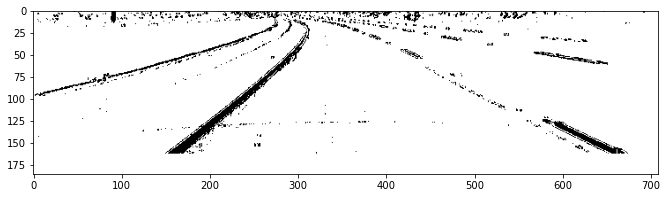

In [1]:
# Lodz University of Technology
# 2022-23 Image Processing Assignment 9
# @Ahmet Galip Sengun - 904261
# November 2022

import skimage
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
from skimage.measure import LineModelND


# Load image
road = skimage.io.imread("road.png").astype(np.uint8)

plt.figure(figsize=(14,3))
plt.imshow(road, cmap = "gray")

In [2]:
def ransacc(data, min_samples=2, residual_threshold=4, max_trials=1000):
    
    best_inlier_num = 0
    best_inliers = []
    data = (data, )
    random_state = np.random.default_rng(42)
    num_samples = len(data[0])
    
    # for the first run use initial guess of inliers
    spl_idxs = (random_state.choice(num_samples, min_samples, replace=False))
    
    # estimate model for current random sample set
    model = LineModelND()

    for num_trials in range(max_trials):
        
        
        # for next iteration choose random sample set and be sure that
        # no samples repeat
        samples = [d[spl_idxs] for d in data]
        
        
        # for next iteration choose random sample set and be sure that
        # no samples repeat
        spl_idxs = random_state.choice(num_samples, min_samples, replace=False)
        
        success = model.estimate(*samples)
        
        residuals = np.abs(model.residuals(*data))
        
        # consensus set / inliers
        inliers = residuals < residual_threshold
        residuals_sum = residuals.dot(residuals)

        # choose as new best model if number of inliers is maximal
        inliers_count = np.count_nonzero(inliers)
        
        # check for the best model 
        if (inliers_count > best_inlier_num):
            
            best_inlier_num = inliers_count
            best_inlier_residuals_sum = residuals_sum
            best_inliers = inliers
            
        # estimate final model using all inliers
        if any(best_inliers):
            # select inliers for each data array
            data_inliers = [d[best_inliers] for d in data]
            model.estimate(*data_inliers)
            
    return model, best_inliers

Text(0.5, 1.0, 'threshold = 4')

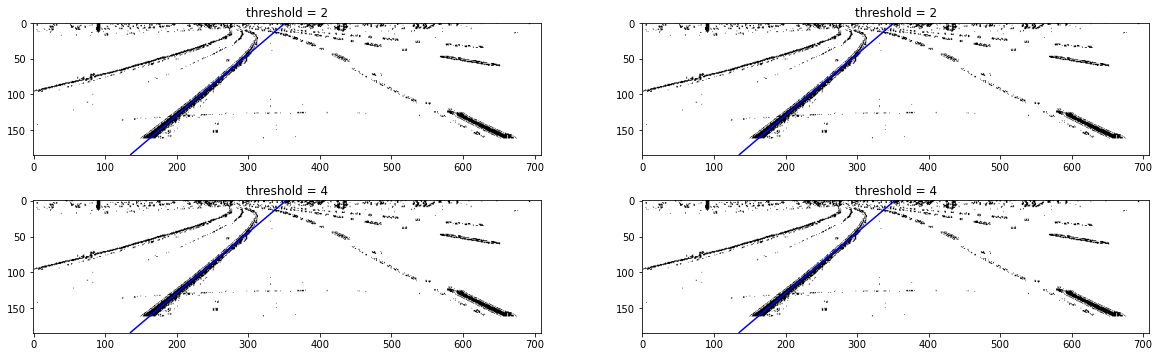

In [7]:
indices = np.where(road != 255)
coordinates = np.array(list(zip(indices[1], indices[0])))
th21, _ = ransacc(coordinates, min_samples=2, residual_threshold=2)
th22, _ = ransacc(coordinates, min_samples=2, residual_threshold=2)
th41, _ = ransacc(coordinates, min_samples=2, residual_threshold=4)
th42, _ = ransacc(coordinates, min_samples=2, residual_threshold=4)

line_y = np.arange(0, 185)

th21_line = th21.predict_x(line_y)
th22_line = th22.predict_x(line_y)
th41_line = th41.predict_x(line_y)
th42_line = th42.predict_x(line_y)


fig, ax = plt.subplots(2, 2, figsize = (20,6))
ax[0,0].imshow(road, cmap="gray")
ax[0,0].plot(th21_line, line_y, '-b')
ax[0,0].set_title("threshold = 2")

ax[0,1].imshow(road, cmap="gray")
ax[0,1].plot(th22_line, line_y, '-b')
ax[0,1].set_title("threshold = 2")

ax[1,0].imshow(road, cmap="gray")
ax[1,0].plot(th41_line, line_y, '-b')
ax[1,0].set_title("threshold = 4")

ax[1,1].imshow(road, cmap="gray")
ax[1,1].plot(th42_line, line_y, '-b')
ax[1,1].set_title("threshold = 4")